In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("pap_smear_old.csv")
df

,Unnamed: 0,Cyto_A,CytoShort,KerneShort,CytoLong,KerneLong,CytoRund,K/C,Kerne_Ycol,CytoPeri,Cyto_Ycol,Kerne_A,KernePeri,KerneMax,KerneMin,target
0,0,606.96,22.12,10.90,42.11,15.03,0.4358,0.167350,0.60,226.30,0.75,121.99,61.88,53,37,0
1,1,440.56,18.29,8.96,35.82,13.36,0.4372,0.166774,0.52,190.69,0.75,88.18,48.49,43,24,0
2,2,234.47,12.82,7.20,37.63,15.44,0.2108,0.228844,0.57,156.50,0.77,69.58,63.94,34,19,0
3,3,366.92,15.17,6.99,37.26,12.62,0.3365,0.088941,0.54,171.47,0.76,35.82,69.66,19,11,0
4,4,277.87,12.57,7.19,35.48,11.53,0.2811,0.142615,0.54,147.28,0.73,46.22,65.29,20,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,201.65,16.49,11.37,39.50,21.08,0.1646,0.468825,0.61,155.62,0.88,177.98,66.47,50,36,1
496,496,63.56,18.24,16.56,33.07,25.80,0.0740,0.835050,0.63,114.71,0.84,321.77,81.22,86,60,1
497,497,220.81,17.68,9.89,39.39,23.22,0.1812,0.424044,0.53,182.46,0.76,162.57,84.71,63,50,1
498,498,430.36,32.93,16.86,38.95,21.71,0.3612,0.391322,0.49,232.68,0.82,276.68,74.46,76,55,1


In [4]:
df.columns

Index(['Unnamed: 0', 'Cyto_A', 'CytoShort', 'KerneShort', 'CytoLong',
       'KerneLong', 'CytoRund', 'K/C', 'Kerne_Ycol', 'CytoPeri', 'Cyto_Ycol',
       'Kerne_A', 'KernePeri', 'KerneMax', 'KerneMin', 'target'],
      dtype='object')

In [5]:
X = df.drop(columns = ["target","Unnamed: 0"])
Y = df.target

In [6]:
print(X.shape)
print(Y.shape)

(500, 14)
(500,)


### Let's mow try to train some model using pipelines 

In [7]:
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

### I will start with the Logistic Regression Classifier and in every model I will compare two different scale methods standard scaler and normalizer and I will compare models with 2 components against all the features 


In [8]:
## Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [9]:
pipeline_lr_1=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [10]:
pipeline_lr_2=Pipeline([('scalar1',Normalizer()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [11]:
pipeline_lr_3=Pipeline([('scalar1',Normalizer()),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [12]:
pipeline_lr_4=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [13]:
## Let's make the list of pipelines
pipelines = [pipeline_lr_1, pipeline_lr_2, pipeline_lr_3, pipeline_lr_4]

In [14]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [15]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'pipeline_lr_1', 1: 'pipeline_lr_2', 2: 'pipeline_lr_3', 3: 'pipeline_lr_4'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [16]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_train,y_train)))

pipeline_lr_1 Test Accuracy: 0.905
pipeline_lr_2 Test Accuracy: 0.8275
pipeline_lr_3 Test Accuracy: 0.83
pipeline_lr_4 Test Accuracy: 0.9525


In [18]:
from sklearn.model_selection import cross_val_score
print('LR_1 SCORES:{}'.format(cross_val_score(pipeline_lr_1, X_train, y_train, cv=10, scoring="accuracy")))
print('LR_2 SCORES:{}'.format(cross_val_score(pipeline_lr_2, X_train, y_train, cv=10, scoring="accuracy")))
print('LR_3 SCORES:{}'.format(cross_val_score(pipeline_lr_3, X_train, y_train, cv=10, scoring="accuracy")))
print('LR_4 SCORES:{}'.format(cross_val_score(pipeline_lr_4, X_train, y_train, cv=10, scoring="accuracy")))
     

LR_1 SCORES:[0.925 0.925 0.975 0.95  0.9   0.9   0.925 0.8   0.9   0.9  ]
LR_2 SCORES:[0.85  0.85  0.825 0.85  0.75  0.85  0.825 0.7   0.875 0.8  ]
LR_3 SCORES:[0.85  0.85  0.825 0.85  0.75  0.85  0.825 0.775 0.9   0.8  ]
LR_4 SCORES:[0.95  0.9   0.975 1.    0.95  0.875 0.975 0.875 0.975 0.925]


In [19]:
## The model that performs closer to the cross validations score is the first one, Let's try to optimaze the parameters of this model
## But first let's evaluate the model before Hyper Parameter Tuning

from sklearn import metrics
y_pred = pipeline_lr_1.predict(X_train)
# Model Accuracy: how often is the classifier correct?
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average=None)



array([0.87662338, 0.92276423])

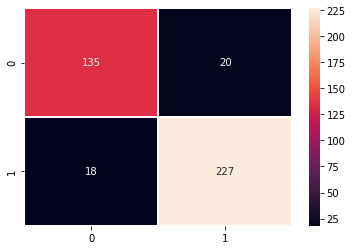

In [20]:
## Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_train, y_pred)
sn.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

In [21]:
from sklearn.metrics import log_loss
print("The Log Loss on Training is: ", log_loss(y_train, y_pred))

The Log Loss on Training is:  3.2812237373880255


###  Hyper Parameter Tuning

#### We will loop over parameter C (Inverse of regularization strength).
#### Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
#### It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum

In [23]:
c=1
pipeline_lr_1=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0, C=c))])

In [208]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    pipeline_lr_1=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0, C=c))])
    log_reg2 = pipeline_lr_1.fit(X_train, y_train)
    score = log_reg2.score(X_train, y_train)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_train)
    log_loss2 = log_loss(y_train, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.6125:
The Logg Loss of C parameter 1e-05 is 0.6643411130415422:

The CA of C parameter 3.359818286283781e-05 is 0.6125:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6568608216826558:

The CA of C parameter 0.00011288378916846884 is 0.6125:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6340460265323602:

The CA of C parameter 0.000379269019073225 is 0.685:
The Logg Loss of C parameter 0.000379269019073225 is 0.5765194410208637:

The CA of C parameter 0.0012742749857031334 is 0.8325:
The Logg Loss of C parameter 0.0012742749857031334 is 0.4784267841710321:

The CA of C parameter 0.004281332398719391 is 0.9025:
The Logg Loss of C parameter 0.004281332398719391 is 0.3745435977329825:

The CA of C parameter 0.01438449888287663 is 0.9075:
The Logg Loss of C parameter 0.01438449888287663 is 0.2998524391904609:

The CA of C parameter 0.04832930238571752 is 0.91:
The Logg Loss of C parameter 0.04832930238571752 is 0.2615634395985887:

The C

In [209]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,17,8858.667904,0.9050,0.245093
1,18,29763.514416,0.9050,0.245093
2,19,100000.000000,0.9050,0.245093
3,16,2636.650899,0.9050,0.245093
4,15,784.759970,0.9050,0.245093
5,14,233.572147,0.9050,0.245093
6,13,69.519280,0.9050,0.245093
7,12,20.691381,0.9050,0.245094
8,11,6.158482,0.9050,0.245097
9,10,1.832981,0.9050,0.245138


### Let's train a SVM model

In [24]:
## I will use the same method as before compared differente types of scales and features
pipeline_SVM_1=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('SVM',SVC(kernel='linear', C=100, gamma="auto"))])

In [25]:
pipeline_SVM_2=Pipeline([('scalar2',Normalizer()),
                     ('pca2',PCA(n_components=2)),
                     ('SVM',SVC(kernel='linear', C=100, gamma="auto"))])

In [26]:
pipeline_SVM_3=Pipeline([('scalar2',Normalizer()),
                     ('SVM',SVC(kernel='linear', C=100, gamma="auto"))])

In [27]:
pipeline_SVM_4=Pipeline([('scalar2',StandardScaler()),
                     ('SVM',SVC(kernel='linear', C=100, gamma="auto"))])

In [28]:
## Let's make the list of pipelines
pipelines = [pipeline_SVM_1, pipeline_SVM_2, pipeline_SVM_3, pipeline_SVM_4]

In [29]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'pipeline_SVM_1', 1: 'pipeline_SVM_2', 2: 'pipeline_SVM_3', 3: 'pipeline_SVM_4'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [30]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_train,y_train)))

pipeline_SVM_1 Test Accuracy: 0.905
pipeline_SVM_2 Test Accuracy: 0.85
pipeline_SVM_3 Test Accuracy: 0.88
pipeline_SVM_4 Test Accuracy: 0.9775


In [31]:
print('SVM_1 SCORES:{}'.format(cross_val_score(pipeline_SVM_1, X_train, y_train, cv=10, scoring="accuracy")))
print('SVM_2 SCORES:{}'.format(cross_val_score(pipeline_SVM_2, X_train, y_train, cv=10, scoring="accuracy")))
print('SVM_3 SCORES:{}'.format(cross_val_score(pipeline_SVM_3, X_train, y_train, cv=10, scoring="accuracy")))
print('SVM_4 SCORES:{}'.format(cross_val_score(pipeline_SVM_4, X_train, y_train, cv=10, scoring="accuracy")))

SVM_1 SCORES:[0.95  0.925 0.975 0.95  0.9   0.9   0.925 0.8   0.9   0.9  ]
SVM_2 SCORES:[0.875 0.9   0.775 0.85  0.875 0.975 0.8   0.725 0.825 0.9  ]
SVM_3 SCORES:[0.9   0.9   0.875 0.925 0.875 0.95  0.825 0.825 0.8   0.875]
SVM_4 SCORES:[0.95  0.95  0.975 0.95  0.925 0.9   1.    0.925 1.    0.975]


In [381]:
## Optimaze the model
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

#parameters = {'pipeline_SVM_1_kernel':('linear', 'poly'), 'C_pipeline_SVM_1':[1, 10, 100]}


grid_params_svm = [{'SVM__kernel': ['linear', 'poly'], 
        'SVM__C': [1,10,20,50,100, 1000]}]

SVM = GridSearchCV(estimator=pipeline_SVM_4,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10
           )

In [382]:
SVM.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scalar2',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVM',
                                        SVC(C=100, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0

In [383]:
SVM.best_params_

{'SVM__C': 1000, 'SVM__kernel': 'poly'}

In [390]:
cv_results = pd.DataFrame(SVM.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVM__C,param_SVM__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024959,0.008074,0.005693,0.001614,1,linear,"{'SVM__C': 1, 'SVM__kernel': 'linear'}",0.950,0.900,0.975,1.000,0.975,0.925,0.975,0.900,0.975,0.950,0.9525,0.032500,5
1,0.018670,0.007324,0.004994,0.000631,1,poly,"{'SVM__C': 1, 'SVM__kernel': 'poly'}",0.900,0.900,0.875,0.950,0.925,0.825,0.900,0.925,0.950,0.925,0.9075,0.035444,12
2,0.029247,0.007764,0.004795,0.001325,10,linear,"{'SVM__C': 10, 'SVM__kernel': 'linear'}",0.950,0.950,0.975,0.975,0.950,0.875,0.975,0.925,0.975,0.975,0.9525,0.030516,5
3,0.017272,0.001185,0.004796,0.001076,10,poly,"{'SVM__C': 10, 'SVM__kernel': 'poly'}",0.925,0.925,0.950,1.000,0.975,0.925,0.950,0.925,0.950,0.950,0.9475,0.023585,9
4,0.034643,0.006668,0.004797,0.001247,20,linear,"{'SVM__C': 20, 'SVM__kernel': 'linear'}",0.950,0.950,0.975,0.950,0.950,0.900,1.000,0.900,0.975,0.975,0.9525,0.030516,5
5,0.017970,0.002187,0.004696,0.000781,20,poly,"{'SVM__C': 20, 'SVM__kernel': 'poly'}",0.925,0.925,0.950,1.000,0.975,0.925,0.925,0.900,0.950,0.925,0.9400,0.027839,11
6,0.051716,0.013078,0.004697,0.000899,50,linear,"{'SVM__C': 50, 'SVM__kernel': 'linear'}",0.950,0.950,0.975,0.950,0.925,0.900,1.000,0.900,1.000,0.975,0.9525,0.034369,4
7,0.017870,0.001134,0.004794,0.000746,50,poly,"{'SVM__C': 50, 'SVM__kernel': 'poly'}",0.950,0.950,0.925,1.000,0.950,0.925,0.925,0.925,0.950,0.925,0.9425,0.022500,10
8,0.108826,0.040972,0.004399,0.000914,100,linear,"{'SVM__C': 100, 'SVM__kernel': 'linear'}",0.950,0.950,0.975,0.950,0.925,0.900,1.000,0.925,1.000,0.975,0.9550,0.031225,2
9,0.015659,0.000104,0.002062,0.004760,100,poly,"{'SVM__C': 100, 'SVM__kernel': 'poly'}",0.950,0.975,0.925,1.000,0.975,0.925,0.925,0.925,0.925,0.950,0.9475,0.026101,8


In [32]:
SVM_1=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('SVM',SVC(kernel='poly', C=100, gamma="auto"))])

In [33]:
SVM_1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scalar2',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca2',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('SVM',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [34]:
y_pred = SVM_1.predict(X_train)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.915


In [36]:
scores = cross_val_score(SVM_1, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.925, 0.95 , 0.95 , 0.95 , 0.9  , 0.875, 0.875, 0.8  , 0.925,
       0.95 ])

In [37]:
f1_score(y_train, y_pred, average=None)

array([0.88513514, 0.93253968])

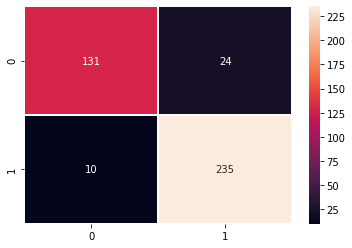

In [38]:
cf_matrix = confusion_matrix(y_train, y_pred)
sn.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

### K-NN model

In [39]:
from sklearn.neighbors import NearestNeighbors
K=6
pipeline_KNN_1=Pipeline([('scalar5',Normalizer()),
                     ('pca5',PCA(n_components=2)),
                     ('KNN',KNeighborsClassifier(n_neighbors = K))])

In [40]:
pipeline_KNN_2=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA(n_components=2)),
                     ('KNN',KNeighborsClassifier(n_neighbors = K))])

In [41]:
pipeline_KNN_3=Pipeline([('scalar5',Normalizer()),
                     ('KNN',KNeighborsClassifier(n_neighbors = K))])

In [42]:
pipeline_KNN_4=Pipeline([('scalar5',StandardScaler()),
                     ('KNN',KNeighborsClassifier(n_neighbors = K))])

In [43]:
## Let's make the list of pipelines
pipelines = [pipeline_KNN_1, pipeline_KNN_2, pipeline_KNN_3, pipeline_KNN_4]

In [44]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'pipeline_KNN_1', 1: 'pipeline_KNN_2', 2: 'pipeline_KNN_3', 3: 'pipeline_KNN_4'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [45]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_train,y_train)))

pipeline_KNN_1 Test Accuracy: 0.89
pipeline_KNN_2 Test Accuracy: 0.92
pipeline_KNN_3 Test Accuracy: 0.91
pipeline_KNN_4 Test Accuracy: 0.9625


In [46]:
print('KNN_1 SCORES:{}'.format(cross_val_score(pipeline_KNN_1, X_train, y_train, cv=10, scoring="accuracy")))
print('KNN_2 SCORES:{}'.format(cross_val_score(pipeline_KNN_2, X_train, y_train, cv=10, scoring="accuracy")))
print('KNN_3 SCORES:{}'.format(cross_val_score(pipeline_KNN_3, X_train, y_train, cv=10, scoring="accuracy")))
print('KNN_4 SCORES:{}'.format(cross_val_score(pipeline_KNN_4, X_train, y_train, cv=10, scoring="accuracy")))

KNN_1 SCORES:[0.85  0.9   0.825 0.9   0.825 0.9   0.775 0.725 0.8   0.925]
KNN_2 SCORES:[0.9   0.925 0.9   0.95  0.875 0.9   0.875 0.8   0.925 0.925]
KNN_3 SCORES:[0.9   0.95  0.875 0.875 0.9   0.95  0.8   0.825 0.8   0.925]
KNN_4 SCORES:[0.95  0.975 0.925 1.    0.975 0.975 0.975 0.875 0.95  0.95 ]


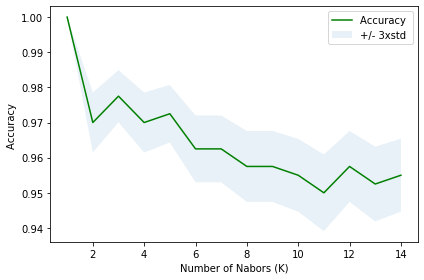

In [47]:
## The last model is impressive but let's try some different K values 
## Try 15 different K

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    pipeline_KNN_4=Pipeline([('scalar5',StandardScaler()),
                     ('KNN',KNeighborsClassifier(n_neighbors = n))])
    
    #Train Model and Predict  
    neigh = pipeline_KNN_4.fit(X_train,y_train)
    yhat=neigh.predict(X_train)
    mean_acc[n-1] = metrics.accuracy_score(y_train, yhat)

    
    std_acc[n-1]=np.std(yhat==y_train)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [48]:
## I will train a model with K=8 in order to make the model more complex

pipeline_KNN_4=Pipeline([('scalar5',StandardScaler()),
                     ('KNN',KNeighborsClassifier(n_neighbors = 8))])

In [49]:
pipeline_KNN_4.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar5',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=8, p=2,
                                      weights='uniform'))],
         verbose=False)

In [50]:
y_pred = pipeline_KNN_4.predict(X_train)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9575


In [52]:
scores = cross_val_score(pipeline_KNN_4, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.925, 0.975, 0.925, 1.   , 0.975, 0.95 , 0.975, 0.85 , 0.95 ,
       0.95 ])

In [53]:
f1_score(y_train, y_pred, average=None)

array([0.94637224, 0.96480331])

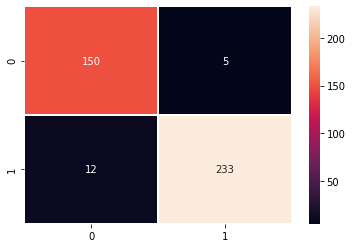

In [54]:
cf_matrix = confusion_matrix(y_train, y_pred)
sn.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

### Decision Tree Classifier 

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [56]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [57]:
y_pred = clf.predict(X_train)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 1.0


In [59]:
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.95 , 1.   , 0.925, 0.95 , 0.925, 0.95 , 0.925, 0.85 , 0.95 ,
       0.925])

[Text(472.15384615384613, 1037.7818181818182, 'X[4] <= 14.21\ngini = 0.475\nsamples = 400\nvalue = [155, 245]'),
 Text(279.0, 938.9454545454546, 'X[13] <= 26.0\ngini = 0.111\nsamples = 136\nvalue = [128, 8]'),
 Text(171.69230769230768, 840.1090909090909, 'X[7] <= 0.545\ngini = 0.033\nsamples = 120\nvalue = [118, 2]'),
 Text(85.84615384615384, 741.2727272727273, 'X[6] <= 0.244\ngini = 0.017\nsamples = 118\nvalue = [117, 1]'),
 Text(42.92307692307692, 642.4363636363637, 'gini = 0.0\nsamples = 113\nvalue = [113, 0]'),
 Text(128.76923076923077, 642.4363636363637, 'X[6] <= 0.267\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(85.84615384615384, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(171.69230769230768, 543.6, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(257.53846153846155, 741.2727272727273, 'X[4] <= 11.45\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(214.61538461538458, 642.4363636363637, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(300.46153846153845, 64

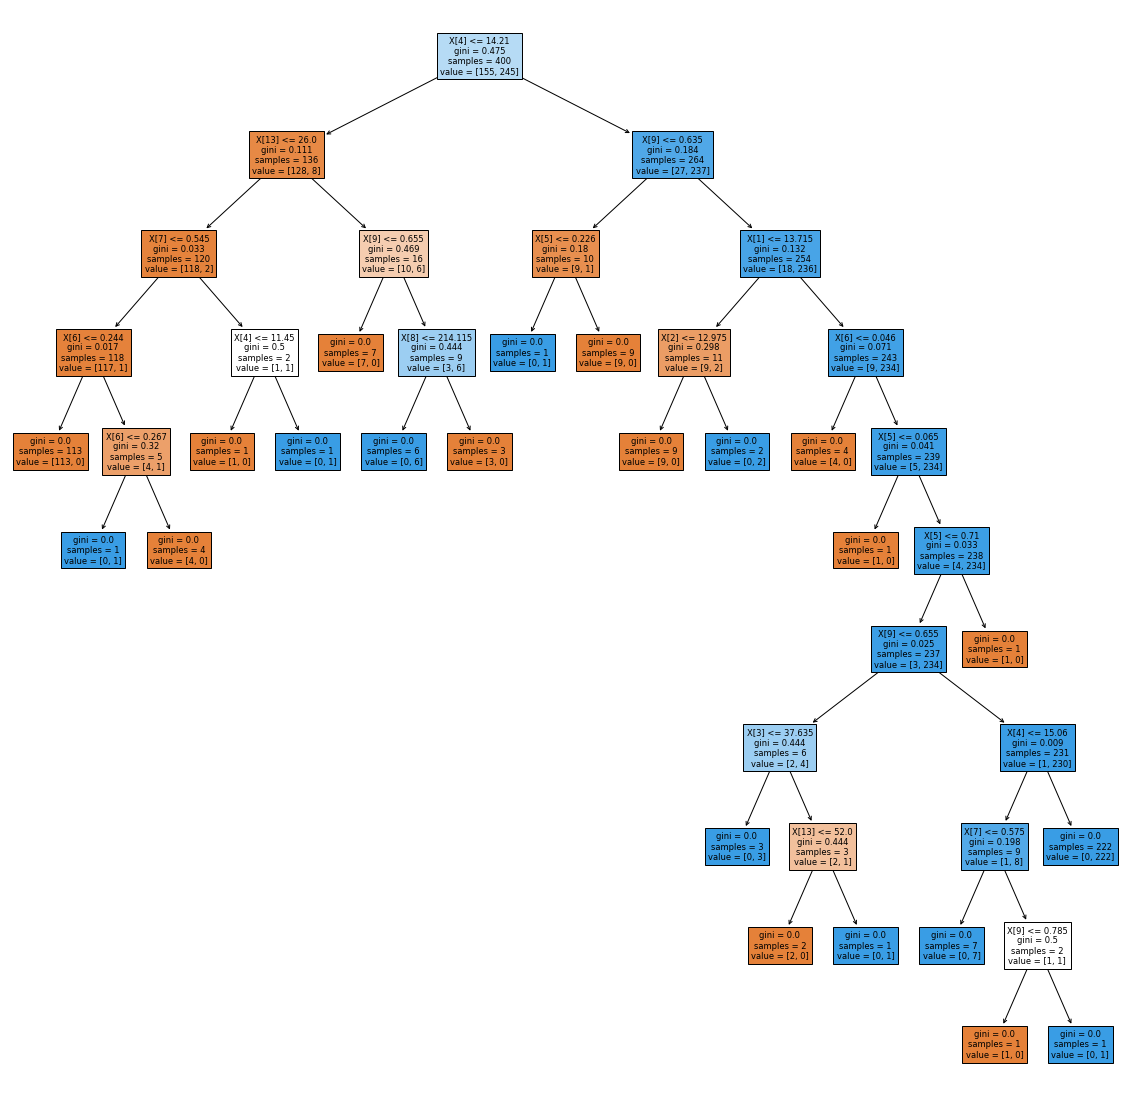

In [60]:
## the cross validation scores show us that the model the model is overfitting
##Let's plot the tree in order to understand what's wrong

from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True)

In [61]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

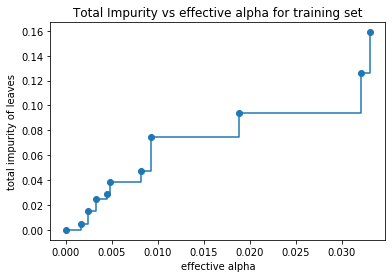

In [62]:
## In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [63]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3158472593582889


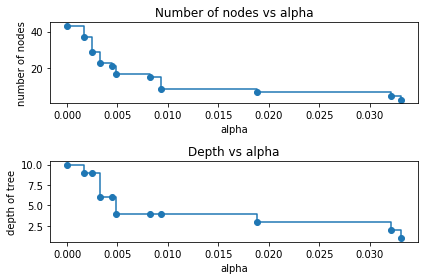

In [64]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

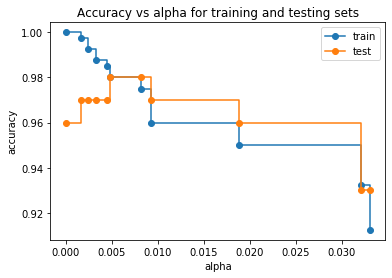

In [65]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [66]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.0125, max_depth=3, max_leaf_nodes=10 )
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0125, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
y_pred = clf.predict(X_train)

In [68]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.95


In [69]:
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
scores

array([1.   , 1.   , 0.925, 0.975, 0.925, 0.975, 0.85 , 0.85 , 0.9  ,
       0.875])

[Text(372.0, 951.3000000000001, 'X[4] <= 14.21\ngini = 0.475\nsamples = 400\nvalue = [155, 245]'),
 Text(186.0, 679.5, 'gini = 0.111\nsamples = 136\nvalue = [128, 8]'),
 Text(558.0, 679.5, 'X[9] <= 0.635\ngini = 0.184\nsamples = 264\nvalue = [27, 237]'),
 Text(372.0, 407.70000000000005, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(744.0, 407.70000000000005, 'X[1] <= 13.715\ngini = 0.132\nsamples = 254\nvalue = [18, 236]'),
 Text(558.0, 135.89999999999998, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(930.0, 135.89999999999998, 'gini = 0.071\nsamples = 243\nvalue = [9, 234]')]

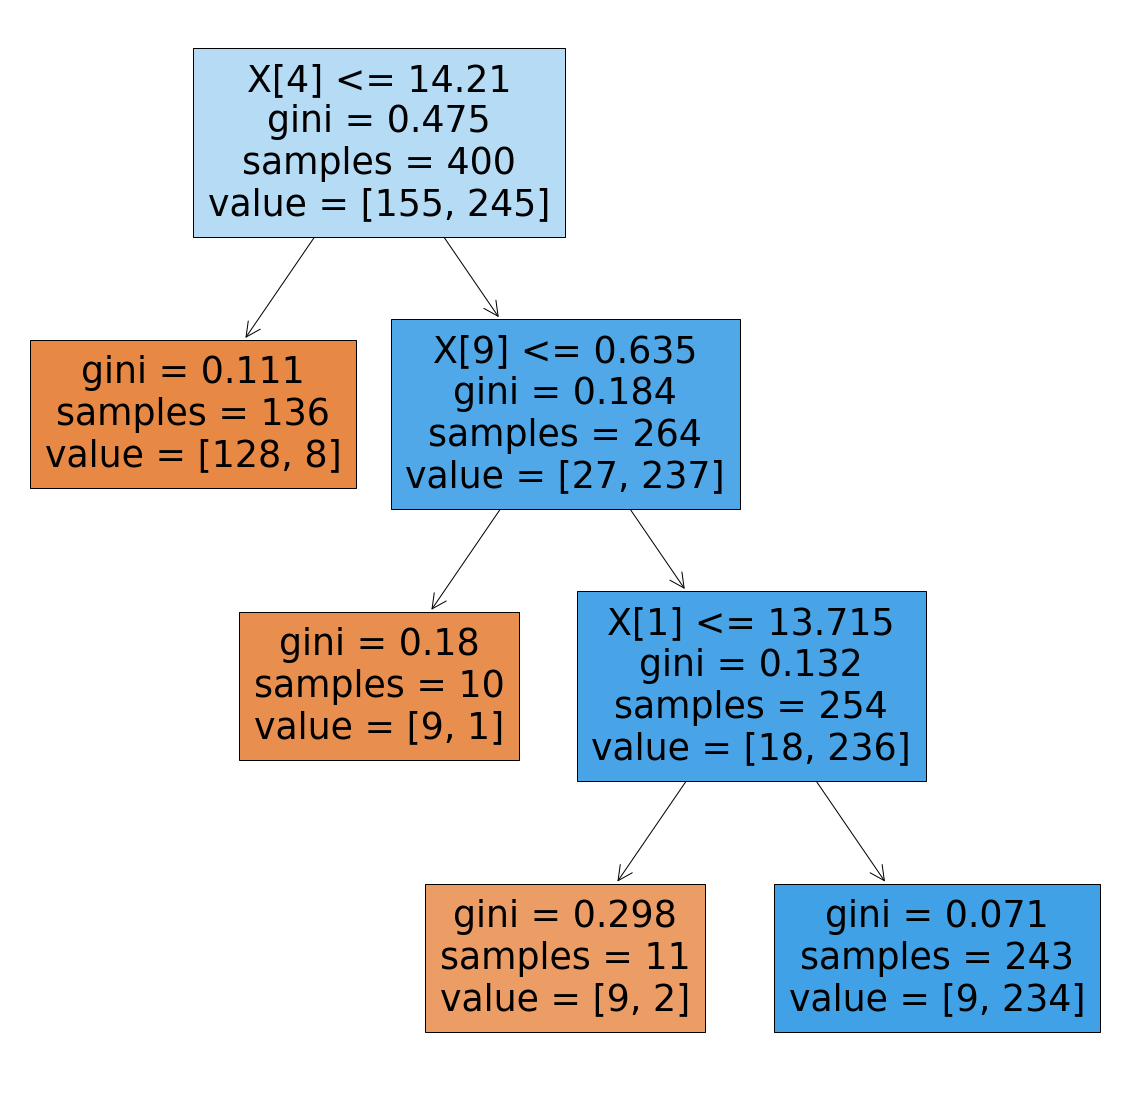

In [70]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True)

In [71]:
## calculating the f1 scores
f1_score(y_train, y_pred, average=None)

array([0.93589744, 0.95901639])

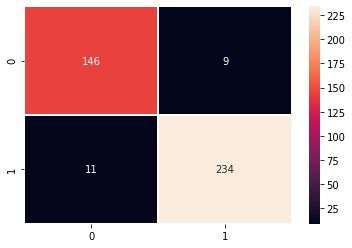

In [72]:
cf_matrix = confusion_matrix(y_train, y_pred)
sn.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

### Let's use the Bagging techique in order to to train an ensemble of 500 Decision Tree Classifiers

In [73]:
from sklearn.ensemble import BaggingClassifier

In [74]:
model = BaggingClassifier(DecisionTreeClassifier(),
                         n_estimators=500,
                         max_samples=100,
                         bootstrap=True,
                         n_jobs=-1, oob_score=True)

In [75]:
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [76]:
y_pred = model.predict(X_train)

In [77]:
print("The training set Accuracy is", metrics.accuracy_score(y_train, y_pred))

The training set Accuracy is 0.965


In [78]:
## Let's compute the oob score
model.oob_score_

0.9425

In [79]:
## According to the oob score the classifier is likely to achieve about 94% accuracy on the test set, 
## Before this computation let's check the Cross Validation Scores

In [80]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.975, 1.   , 0.95 , 1.   , 0.925, 0.925, 0.925, 0.875, 0.9  ,
       0.9  ])

In [81]:
## calculating the f1 scores
f1_score(y_train, y_pred, average=None)

array([0.95541401, 0.97119342])

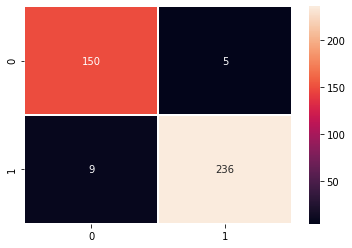

In [82]:
cf_matrix = confusion_matrix(y_train, y_pred)
sn.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

### Now it's time to compute the training set accuracy and compare the models

In [83]:
y_pred_SVM = SVM_1.predict(X_test)
y_pred_KNN = pipeline_KNN_4.predict(X_test)
y_pred_DT = clf.predict(X_test)
y_pred_Bagg = model.predict(X_test)

In [84]:
## Let's make a list of the models
models = [SVM_1, pipeline_KNN_4, clf, model]

In [85]:
# Dictionary of pipelines and classifier types for ease of reference
model_dict = {0: 'SVM', 1: 'KNN', 2: 'DecisionTree', 3: 'BaggingClassifier'}


In [86]:
for i,model in enumerate(models):
    print("{} Test Accuracy: {}".format(model_dict[i],model.score(X_test,y_test)))

SVM Test Accuracy: 0.96
KNN Test Accuracy: 0.99
DecisionTree Test Accuracy: 0.96
BaggingClassifier Test Accuracy: 0.96


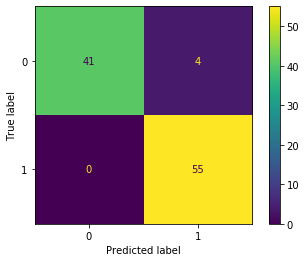

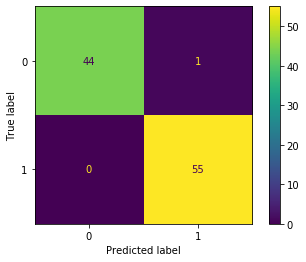

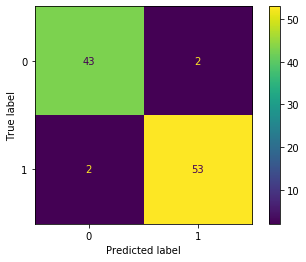

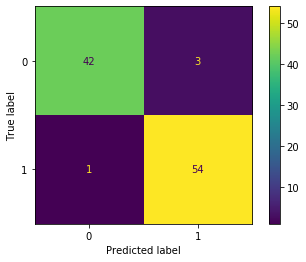

In [90]:
from sklearn.metrics import plot_confusion_matrix
for i in models:
        plot_confusion_matrix(i, X_test, y_test)
        plt.show()

In [91]:
## Let's also see again the training scores
for i,model in enumerate(models):
    print("{} Training set Accuracy: {}".format(model_dict[i],model.score(X_train,y_train)))

SVM Training set Accuracy: 0.915
KNN Training set Accuracy: 0.9575
DecisionTree Training set Accuracy: 0.95
BaggingClassifier Training set Accuracy: 0.965


## let's now upload a new data set and apply some models in order to verify the accuracy